In [14]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
from core.scm import read_system

# Suzy/Billy's example

In [15]:
tmp_file_path = !mktemp
tmp_file_path = tmp_file_path[0]

In [16]:
%%writefile {tmp_file_path}
[equations]
ST = STu
BT = BTu

# Suzy's rock hits if she throws.
SH = ST

# Billy's rock hits only if he throws and Suzy doesn't throw.
BH = BT * (1 - ST)

# The bottle is shattered if either rock hits.
BS = min(1, SH + BH)

[domains]
ST,BT,SH,BH,BS: Int(0,1)

Overwriting /tmp/tmp.wSolGxfUZg


Graphviz layout not available; using spring layout instead.


/home/me/phd/actual-causality/demos/../core/scm.py:233: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


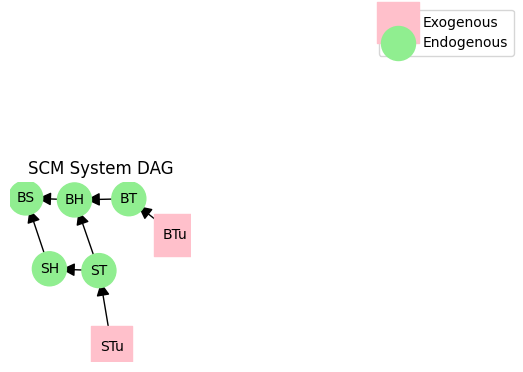

In [17]:
system = read_system(tmp_file_path)
system.display_dag()

In [18]:
# testing the system
for STu, BTu in [[0,0],[0,1],[1,0],[1,1]]:
    print(STu, BTu)
    state = system.get_state({'STu': STu, 'BTu': BTu})
    print(state)
    assert state['BS'] == min(1, STu + BTu)

0 0
{'STu': 0, 'BTu': 0, 'BT': 0, 'ST': 0, 'SH': 0, 'BH': 0, 'BS': 0}
0 1
{'STu': 0, 'BTu': 1, 'BT': 1, 'ST': 0, 'SH': 0, 'BH': 1, 'BS': 1}
1 0
{'STu': 1, 'BTu': 0, 'BT': 0, 'ST': 1, 'SH': 1, 'BH': 0, 'BS': 1}
1 1
{'STu': 1, 'BTu': 1, 'BT': 1, 'ST': 1, 'SH': 1, 'BH': 0, 'BS': 1}


In [19]:
a = system.get_state({'STu': 0, 'BTu': 1}, interventions={'SH': 1})['BS']
assert a == 1

Graphviz layout not available; using spring layout instead.


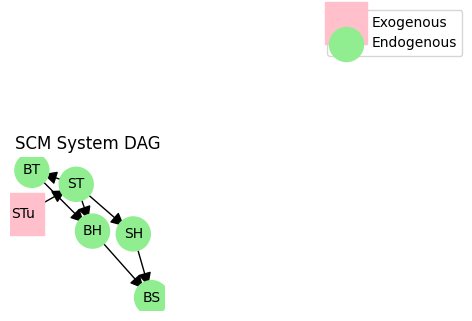

{'ST': 1, 'BT': 0, 'SH': 1, 'BH': 0, 'BS': 1}


In [20]:
system2 = system.replace('BT=1-ST')
system2.display_dag()
state2 = system2.get_state({'ST': 1})
print(state2)

In [21]:
from core.hp_modified import find_all_causes, pretty_print_causes


causes = find_all_causes(system, {'STu': 0, 'BTu': 1}, 'BS', '==', 1)
print(causes)
pretty_print_causes(system, {'STu': 0, 'BTu': 1}, causes)

100%|██████████| 16/16 [00:00<00:00, 6302.49it/s]

{'ac2_time': 0.009198188781738281, 'ac3_time': 2.9325485229492188e-05, 'results': [{'X_x_prime': {'BH': 0}, 'W': (), 'w': {}}, {'X_x_prime': {'BH': 0}, 'W': ('ST',), 'w': {'ST': 0}}, {'X_x_prime': {'BH': 0}, 'W': ('SH',), 'w': {'SH': 0}}, {'X_x_prime': {'BH': 0}, 'W': ('BT',), 'w': {'BT': 1}}, {'X_x_prime': {'BH': 0}, 'W': ('ST', 'SH'), 'w': {'ST': 0, 'SH': 0}}, {'X_x_prime': {'BH': 0}, 'W': ('ST', 'BT'), 'w': {'ST': 0, 'BT': 1}}, {'X_x_prime': {'BH': 0}, 'W': ('SH', 'BT'), 'w': {'SH': 0, 'BT': 1}}, {'X_x_prime': {'BH': 0}, 'W': ('ST', 'SH', 'BT'), 'w': {'ST': 0, 'SH': 0, 'BT': 1}}, {'X_x_prime': {'ST': 1}, 'W': ('SH',), 'w': {'SH': 0}}, {'X_x_prime': {'ST': 1}, 'W': ('SH', 'BT'), 'w': {'SH': 0, 'BT': 1}}, {'X_x_prime': {'BT': 0}, 'W': (), 'w': {}}, {'X_x_prime': {'BT': 0}, 'W': ('ST',), 'w': {'ST': 0}}, {'X_x_prime': {'BT': 0}, 'W': ('SH',), 'w': {'SH': 0}}, {'X_x_prime': {'BT': 0}, 'W': ('ST', 'SH'), 'w': {'ST': 0, 'SH': 0}}]}
Times: AC1=0.00920, AC2=0.00003
The fact that BH=1 (BH'=0